In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.linalg import expm

In [2]:
sigma_x = np.array([[0.,1.+0.0j],[1.+0.0j,0]])
sigma_z = np.array([[1.0,0.0j],[0.0j,-1]])
I2 = np.array([[1.0,0.0j],[0.0j,1.0]])

## What should a perceptron look like? 

Output neurons in systems of perceptrons evolve depending on the state of the input neurons. $|s>|0>$ outlines $s$ as the input neurons and $|0>$ as the output neuron in the rest-state.  With $|s> U(s) |0>$, in the classical case, ideally:

Output neurons in systems of perceptrons evolve depending on the state of the input neurons. $|s>|0>$ outlines $s$ as the input neurons and $|0>$ as the output neuron in the rest-state.  With $|s> U(s) |0>$, in the classical case, ideally:

$U(s)|0>$ $\propto$ $|\Psi_t(h)>$, where $h = \Sigma_n J_n s_n - \Delta_0$

In this case, input spins that are interacting only with output one via Ising-type interactions are sufficient.

## Unitary perceptrons

Thus, there exists a natural quantum encoding of a perceptron.  Notable properties of perceptrons include their being unitary and brain-like, as well as $\Psi$ being used for universal approximation.

So far, the evolution on the input neurons is classical, but one can engineer nonclassical Hamiltonians through pulsing.  Nonclassical Hamiltonian evolutions and universal quanutm computation on the input neurons allows for entangling gates, single-qubit rotations, and the "do-nothing" operation.

The use case for perceptrons is divided into both classical and quantum tasks.  Classical tasks include classification of handwritten digits, using only a few qubits.  This yields an accuracy ~98%.  Quantum tasks include entanglement classification using the output neuron to perform energy measurements.  Some Hamiltonians can be used as entanglement witnesses.

## Hamiltonian
$H$ = $\Omega_0/2 \sigma_0^x$ + $\sum_{n \in I} J_n \sigma_n^z \sigma_0^z - \Delta_0 \sigma_0^z$, 

which can be approximated as,

$H$ = $\Omega_0/2 \sigma_0^x$ + $h \sigma_0^z$

The probability of the output being in state $|0>$ is a nonlinear function of h:

$P_0$ = $(8h^2 + \Omega_0^2 + \Omega_0^2 cos(\sqrt{4h^2 + \Omega_0^2 t}))$/$(8h^2 + 2\Omega_0^2)$

## Pulse-sequence and activation functions 

Let the output start at $|0>$.  The output neuron flips with probability $P_1 = sin^2f(h)t$, where $h = \Sigma J_n s_n - \Delta$.

We want to implement any $f(h)$ = $\Sigma c_k $sin$(kh)$, which means we need to implement $e^{(-i \sigma_0^x t \sum c_k sin(kh))}$ = $\Pi_k e^{(-i \sigma_0^x t c_k sin(kh))}$

A single term of this expansion, for small t, yield:

## Functions to calculate the Fourier series

In [3]:
#This function returns the Fourier coefficients of a periodic function with [li, lf] as the period
def fourier(li, lf, K, f):
    l = (lf-li)/2
    # Constant term
    a0=1/l*integrate.quad(lambda x: f(x), li, lf)[0]
    # Cosine coefficents
    A = np.zeros((K))
    # Sine coefficents
    B = np.zeros((K))
     
    for k in range(1,K+1):
        A[k-1]=1/l*integrate.quad(lambda x: f(x)*np.cos(k*np.pi*x/l), li, lf)[0]
        B[k-1]=1/l*integrate.quad(lambda x: f(x)*np.sin(k*np.pi*x/l), li, lf)[0]
 
    return [a0/2.0, A, B]

# This functions returns the value of the Fourier series for a given value of x given the already calculated Fourier coefficients
def fourierSeries(coeffs,x,l,K):
    value = coeffs[0]
    for k in range(1,K+1):
        value = value + coeffs[1][k-1]*np.cos(k*np.pi*x/l) +  coeffs[2][k-1]*np.sin(k*np.pi*x/l)
    return value

# Function that will convert any given function 'f' defined in a given range '[li,lf]' to a periodic function of period 'lf-li' 
def periodicf(li,lf,f,x):
    if x>=li and x<=lf :
        return f(x)
    elif x>lf:
        x_new=x-(lf-li)
        return periodicf(li,lf,f,x_new)
    elif x<(li):
        x_new=x+(lf-li)
        return periodicf(li,lf,f,x_new)

## Activation functions

In [4]:
def periodicf(li,lf,f,x):
    if x>=li and x<=lf :
        return f(x)
    elif x>lf:
        x_new=x-(lf-li)
        return periodicf(li,lf,f,x_new)
    elif x<(li):
        x_new=x+(lf-li)
        return periodicf(li,lf,f,x_new)

def ReLu(x):    
    if x<0: return 0
    else: return x

def ReLuP(x, li, lf): 
    return periodicf(li,lf,ReLu,x)

def cosinvsigmoid(x): 
    return np.arccos(np.sqrt(sigmoid(x)))

def sigmoid(x): 
    return 1/(1+np.exp(-x*np.pi))

def sigmoidP(x, li, lf): 
    return periodicf(li, lf, sigmoid, x)

def tanh(x): 
    return np.tanh(x)

def tanhP(x, li, lf): 
    return periodicf(li, lf, tanh, x)

def step(x): 
    if x<0: return 0
    else: return 1
    
def stepP(x, li, lf): 
    return periodicf(li, lf, step, x)
    
def LeakyReLu(x, a=0.01): 
    if x<0: return a*x
    else: return x
    
def LeakyReLuP(x, li, lf): 
    return periodicf(li, lf, LeakyReLu, x)

def swish(x): 
    return x*sigmoid(x)

def swishP(x, li, lf): 
    return periodicf(li, lf, swish, x)

## Example: ReLu function

In [5]:
K=30
li, lf= -np.pi, np.pi
coeffs = fourier(li,lf,K,ReLu)
a0, aks, bks =coeffs[0], np.array(coeffs[1]), np.array(coeffs[2])

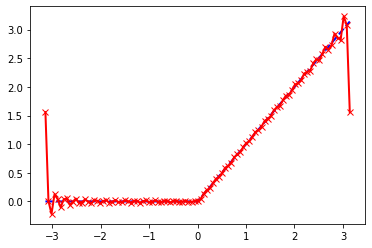

In [6]:
#Plotting it to show the approximation works: 
hs=np.linspace(-np.pi,np.pi,101)
plt.figure()
plt.plot(hs, [ReLu(h) for h in hs], color='blue', linewidth=2,linestyle='--')
plt.plot(hs, [fourierSeries(coeffs,h,np.pi,K) for h in hs], color='red', linewidth=2,marker='x')
plt.show()

In [7]:
#Function that gives us the probability for a value of h, and coefficients
def get_prob(h, a0, aks, bks, l, K, psi0, sz=0.01, sx=0.01):
    a0=a0+np.random.normal(scale=sx)
    aks=aks+np.random.normal(scale=sx, size=len(aks))
    bks=bks+np.random.normal(scale=sx, size=len(bks))
    
    H = a0*sigma_x #(a0+np.random.normal(scale=sigmax))*sigma_x
    for k in range(1,K+1): 
        th = (h+np.random.normal(scale=sz))*k*np.pi/(2*l)
        #every theta must be sampled from above with sigmaz within the line
        H+=aks[k-1]/2*(I2*np.cos(th)+1j*np.sin(th)*sigma_z)@sigma_x@(I2*np.cos(th)-1j*np.sin(th)*sigma_z)
        H+=aks[k-1]/2*(I2*np.cos(th)-1j*np.sin(th)*sigma_z)@sigma_x@(I2*np.cos(th)+1j*np.sin(th)*sigma_z)
        th=th+np.pi/4
        H+=-bks[k-1]/2*(I2*np.cos(th)+1j*np.sin(th)*sigma_z)@sigma_x@(I2*np.cos(th)-1j*np.sin(th)*sigma_z)
        H+=-bks[k-1]/2*(I2*np.cos(th)-1j*np.sin(th)*sigma_z)@sigma_x@(I2*np.cos(th)+1j*np.sin(th)*sigma_z)

    return (np.real(psi0.conj().T@expm(-1j*H)@psi0).item())**2

def get_prob_toy(h, a0, aks, bks, l, K, psi0): 
    fh = a0
    for k in range(1,K+1): 
        fh+= aks[k-1]*np.cos(h*k*np.pi/l)
        fh+= bks[k-1]*np.sin(h*k*np.pi/l)
    return (np.real(psi0.conj().T@expm(-1j*fh*sigma_x)@psi0).item())**2

def get_prob_hardcode(f, h, psi0): 
    return (np.real(psi0.conj().T@expm(-1j*f(h)*sigma_x)@psi0).item())**2

In [10]:
#Initial state
psi0 = np.array([[1.0],[0.0j]])

#Let's test out function. For h=0, ReLu(h)=0 so exp(-1j*sigmax*f(h))=identity
p= get_prob(0, a0, aks, bks, np.pi, K, psi0,sx=0,sz=0)
p_toy = get_prob_toy(0, a0, aks, bks, np.pi, K, psi0)
p_hc = get_prob_hardcode(tanh,0, psi0)
print(p, p_toy, p_hc)

#A bit more complicated
h=1/2
p= get_prob(h, a0, aks, bks, np.pi, K, psi0,sx=0,sz=0)
p_toy = get_prob_toy(h, a0, aks, bks, np.pi, K, psi0)
p_hc = get_prob_hardcode(tanh,h, psi0)
print(p, p_toy, p_hc)

0.4999999999999998 0.4999999999999998 1.0
0.8432507159100256 0.8432507159100254 0.8012229541123499


In [9]:
#With 0.01 noise
hs= np.linspace(-3,3,100)
ps = [get_prob(h, a0, aks, bks, np.pi, K, psi0,sx=0.01, sz=0.1) for h in hs]
ps_toy = [get_prob_toy(h, a0, aks, bks, np.pi, K, psi0) for h in hs]
ps_hc = [get_prob_hardcode(ReLu, h, psi0) for h in hs]

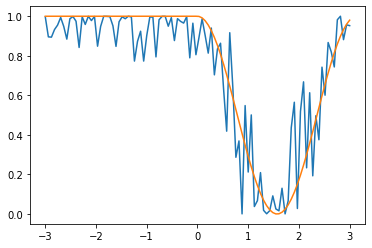

In [10]:
plt.figure()
plt.plot(hs, ps)
#plt.plot(hs, ps_toy)
plt.plot(hs, ps_hc)
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error
mean_squared_error(np.array(ps_hc),np.array(ps))

0.019336671482339713

## Example: sigmoid

In [8]:
K=10
li, lf= -np.pi, np.pi
coeffs = fourier(li,lf,K,cosinvsigmoid)
a0, aks, bks =coeffs[0], np.array(coeffs[1]), np.array(coeffs[2])

In [11]:
#With 0.01 noise
hs= np.linspace(-3,3,100)
ps = [get_prob(h, a0, aks, bks, np.pi, K, psi0,sx=0.0, sz=0.0) for h in hs]
ps_noise = [get_prob(h, a0, aks, bks, np.pi, K, psi0,sx=0.05, sz=0.05) for h in hs]

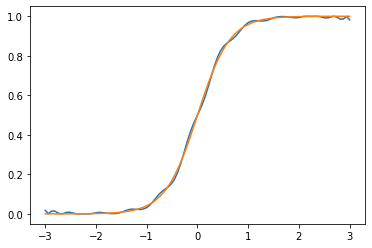

In [12]:
plt.figure()
plt.plot(hs, ps)
#plt.plot(hs, ps_noise)
plt.plot(hs, [sigmoid(h) for h in hs])
plt.show()

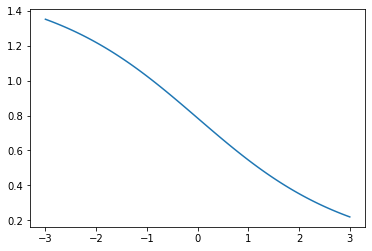